In [1]:
using Plots
using LinearAlgebra
using DelimitedFiles
using Distributions
gr()

Plots.GRBackend()

# 例29 ロジスティック関数の描画

In [2]:
function f(x, β0, β)
    exp.(β0 .+ β * x) ./ (1 .+ exp.(β0 .+ β * x))
end

f (generic function with 1 method)

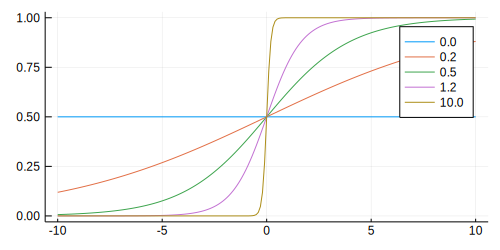

In [3]:
β0 = 0
βseq = Float64[0.0, 0.2, 0.5, 1.2, 10.0]
x_seq = collect(-10:0.1:10);

p = plot(size=(500, 250))

for β in βseq
    yx = f(x_seq, β0, β)
    plot!(p, x_seq, yx, label="$β")
end

p

# 例31 Newton-Raphson-method (1変数)

In [4]:
f(x) = x .^ 2 .- 1;
fp(x) = 2 .* x;

In [5]:
xseq = collect(-1:0.1:5);
yx = f(xseq);

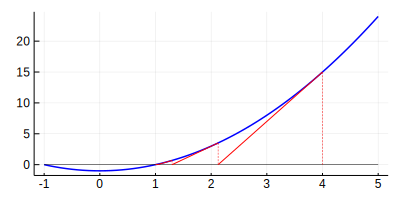

In [6]:
p = plot(size=(400, 200))
plot!(p, xseq, yx, color=:blue, lw=1.5)
plot!(p, xseq, [0 for i in 1:length(xseq)], color=:black, lw=0.5)

x = 4
for i in 1:10
    X = x
    Y = f(X)
    x = x - f(x) / fp(x)
    y = f(x)
    
    plot!(p, [X, x], [Y, 0], legend=nothing, color=:red)
    plot!(p, [X, X], [Y, 0], legend=nothing, color=:red, lw=0.5, ls=:dash)
    
end

p

# 例32 Newton-Raphson-method (2変数)

In [7]:
f(x, y) = x.^ 2 .+ y .^ 2 .- 1;
dfx(x, y) = 2 .* x
dfy(x, y) = 2 .* y

g(x, y) = x .+ y;
dgx(x, y) = 1
dgy(x, y) = 1

dgy (generic function with 1 method)

In [8]:
x, y = 3, 4
for i in 1:10
    J = [dfx(x, y) dfy(x, y); dgx(x, y) dgy(x, y)]
    nxy = inv(J) * [f(x, y); g(x, y)]
    x = x - nxy[1]
    y = y - nxy[2]
    println("$x, $y")
end

-13.000000000000004, 13.000000000000004
-6.519230769230772, 6.519230769230772
-3.297963467211256, 3.297963467211256
-1.7247860905930625, 1.7247860905930625
-1.0073385555621193, 1.0073385555621193
-0.7518480044063836, 0.7518480044063836
-0.7084380190454468, 0.7084380190454468
-0.7071080319623313, 0.7071080319623313
-0.7071067811876538, 0.7071067811876538
-0.7071067811865475, 0.7071067811865475


# 例33 ロジスティック回帰を降下法で計算

In [9]:
# 人工データ作成

N = 1000
p = 2
dn = Normal()
X = [ones(N) rand(dn, N) rand(dn, N)];
β = [rand(dn) for _ in 1:p + 1];
prob = 1 ./ (1 .+ exp.(X * β));
y = Int64[]
for i in 1:N
    if rand() > prob[i]
        push!(y, 1)
    else
        push!(y, -1)
    end
end
β

3-element Array{Float64,1}:
 0.6385174970584063 
 0.18988013697782788
 0.07128922916764759

In [10]:
# パラメータの学習

# 初期値
γold = [Inf, Inf, Inf]
γ = [rand(dn) for _ in 1:p + 1];
ϵ = 1e-6

# loop
while norm(γold - γ) > ϵ
    γold = γ
    s = X * γold
    v = exp.(-s .* y)
    u = (y .* v) ./ (1 .+ v)
    w = v ./ (1 .+ v) .^ 2
    W = diagm(w)
    z = s .+ u ./ w
    γ = inv(X' * W * X) * X' * W * z
    println(γ)
end

[0.6897031818360645, 0.3821325570698934, -0.02664140273798116]
[0.6005896808390004, 0.19292734672423897, 0.1038678920414764]
[0.6104405302657024, 0.20394316161063133, 0.09871842183662366]
[0.6104828889081224, 0.20398910169475057, 0.09870574665396756]
[0.6104828896481389, 0.2039891025286471, 0.09870574653416303]


In [11]:
println(γ)
println(β)

[0.6104828896481389, 0.2039891025286471, 0.09870574653416303]
[0.6385174970584063, 0.18988013697782788, 0.07128922916764759]


# 例34 半分ずつ

In [12]:
# 未実装 (面倒)

# 例35 二次元分類

In [13]:
μ1 = [2, 2];
σ1, σ2, ρ1 = 2, 2, 0;
μ2 = [-3 -3];
σ3, σ4, ρ2 = 1, 1, -0.8;

In [14]:
# 真のデータ作成
n = 100
dnormal = Normal()

# 1
u = rand(dnormal, n);
v = rand(dnormal, n);
x1 = σ1 .* u .+ μ1[1];
y1 = (ρ1 .* u .+ sqrt.(1 - ρ1 * ρ1) .* v) .* σ2 .+ μ1[2];

# 2
u = rand(dnormal, n);
v = rand(dnormal, n);
x2 = σ3 .* u .+ μ2[1];
y2 = (ρ2 .* u .+ sqrt.(1 - ρ2 * ρ2) .* v) .* σ4 .+ μ2[2];

In [15]:
# データからパラメータ推定
μhat1 = [mean(x1) mean(y1)]';
μhat2 = [mean(x2) mean(y2)]';

df1 = [x1 y1]
mat1 = cov(df1)
inv1 = inv(mat1)
de1 = det(mat1)

df2 = [x2 y2]
mat2 = cov(df2)
inv2 = inv(mat2)
de2 = det(mat2)

0.49030632463948454

In [16]:
### 関数 (w/ estimated params)
function f(x, mu, inv, de)
    return (-0.5 .* (x .- mu)' * inv * (x .- mu) .- 0.5 * log(de))
end

f1(u, v) = f([u, v], μhat1, inv1, de1)
f2(u, v) = f([u, v], μhat2, inv2, de2)

f2 (generic function with 1 method)

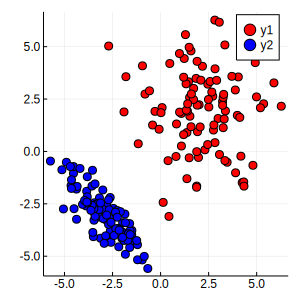

In [17]:
# 元データのプロット

p = plot(size=(300, 300))
plot!(p, x1, y1, seriestype=:scatter, color=:red)
plot!(p, x2, y2, seriestype=:scatter, color=:blue)
p

In [18]:
π1 = 0.5
π2 = 0.5
u = v = collect(range(-6, 6, length=50));
m = length(u)
w = zeros(m, m);

for i in 1:m, j in 1:m
    w[i, j] = (log(π1) .+ f1(u[i], v[j]) .- log(π2) .- f2(u[i], v[j]))[1]
end

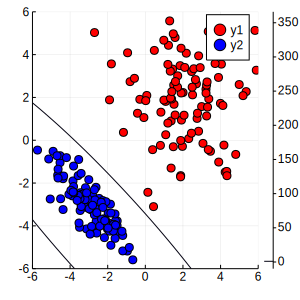

In [19]:
p = plot(size=(300, 300), xlims=(-6, 6), ylims=(-6, 6))
plot!(p, x1, y1, seriestype=:scatter, color=:red)
plot!(p, x2, y2, seriestype=:scatter, color=:blue)
contour!(p, u, v, w, levels=[1])  # 等高線 (1は図2.3の等高線が level value 1であるから設定)
p

# 例35'二次元分類 (線形の場合)

In [20]:
xx = [(x1 .- μ1[1]); (x2 .- μ2[1])]; # 縦にならべる (python concatenate 0, reshape(-1, 1))
yy = [(y1 .- μ1[2]); (y2 .- μ2[2])];
df = [xx yy];
matL = cov(df)
invL = inv(matL)
deL = det(matL)

wL = zeros(m, m);


# 線形の場合に設定し直す
f1L(u, v) = f([u, v], μhat1, invL, deL)
f2L(u, v) = f([u, v], μhat2, invL, deL)

for i in 1:m, j in 1:m
    wL[i, j] = (log(π1) .+ f1L(u[i], v[j]) .- log(π2) .- f2L(u[i], v[j]))[1]
end


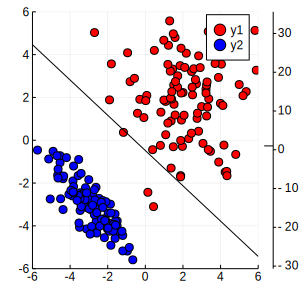

In [21]:
# 線形判別の場合のプロット
p = plot(size=(300, 300), xlims=(-6, 6), ylims=(-6, 6))
plot!(p, x1, y1, seriestype=:scatter, color=:red)
plot!(p, x2, y2, seriestype=:scatter, color=:blue)
contour!(p, u, v, wL, levels=[1], color=:black)
p

# IRIS (from CSV for Julia)

In [22]:
iris_all = readdlm("iris.data", ',')
iris_data = convert.(Float64, iris_all[:,1:4])
iris_label = convert.(String, iris_all[:,end]);

conv = Dict{String, Int}()
for v in iris_label
    if !haskey(conv, v)
        conv[v] = length(conv) + 1
    end
end

iris_label = [conv[v] for v in iris_label];

# 例36

In [23]:
x = iris_data
y = iris_label
n = length(x)

600

# §2.4 k近傍法

In [24]:
function knn_1(x, y, z, k)
    dis = Float64[]
    for i in 1:size(x)[1]
        di = norm(z - x[i, :])
        push!(dis, i)
    end
    
    # argsort k
    
    # bincount
    
    # get m
end

knn_1 (generic function with 1 method)

In [25]:
function knn(x, y, z, k)
    w = []
    for i in 1:size(z)[1]
        push!(w, knn_1(x, y, z[i, :], k))
    end
    w
end

knn (generic function with 1 method)

# 例38 ROC

In [26]:
N0 = 10000
N1 = 1000
μ1 = 1
μ0 = -1
var1 = 1
var0 = 1

dng = Normal(μ0, var0);
dok = Normal(μ1, var1);

x = rand(dng, N0)
y = rand(dok, N1)

# θseq = exp.(collect(-10:0.1:100))
θseq = exp.(collect(-10:1:10))

U = Float64[]
V = Float64[]

for θ in θseq
    u = sum(pdf.(dok, x) ./ pdf.(dng, x) .> θ) / N0
    v = sum(pdf.(dok, y) ./ pdf.(dng, y) .> θ) / N1
    push!(U, u);
    push!(V, v);
end

AUC = 0
for i in 1:length(θseq) - 1
    AUC += abs(U[i + 1] - U[i]) * V[i]
end

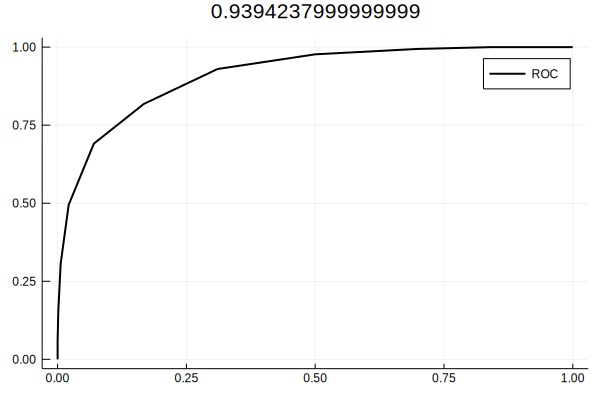

In [27]:
p = plot(figsize=(500, 500))
plot!(p, U, V, label="ROC", color=:black, lw=2, title="$AUC")
p